In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")

In [3]:
# load data
df = pd.read_csv("car_purchasing.csv",encoding='ISO-8859-1')
df.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


## data preprocess


In this project, we will focus on 5 features relevant to the price: 
- age
- gender
- annual salary
- credit card debt
- net worth. 

In addition, the response is column "car purchase amount"

In [6]:
# remove useless columns for prediction
df.drop(columns = ['customer name', 'customer e-mail', 'country'], inplace = True)
df.describe()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


## seperate raw data into X and y

In [7]:
X = df.drop ("car purchase amount", axis = 1)
X.head()

,gender,age,annual Salary,credit card debt,net worth
0,0,41.851720,62812.09301,11609.380910,238961.2505
1,0,40.870623,66646.89292,9572.957136,530973.9078
2,1,43.152897,53798.55112,11160.355060,638467.1773
3,1,58.271369,79370.03798,14426.164850,548599.0524
4,1,57.313749,59729.15130,5358.712177,560304.0671


In [8]:
y = df['car purchase amount']
y.head()

0    35321.45877
1    45115.52566
2    42925.70921
3    67422.36313
4    55915.46248
Name: car purchase amount, dtype: float64

## data rescaling

Because Min/Max values are in different ranges among columns, it is required to rescale the data

In [9]:
Scaler = MinMaxScaler()

X = Scaler.fit_transform(X)
y = Scaler.fit_transform(y.values.reshape(-1,1)) # reshaping y values to be column vector

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [20]:

pd.DataFrame(
    data = {
    'train_set': [X_train.shape, y_train.shape],
    'test_set': [X_test.shape, y_test.shape]
    }   
    , index=['X', 'y']
)


,train_set,test_set
X,"(400, 5)","(100, 5)"
y,"(400, 1)","(100, 1)"


## Linear Regression

In [51]:
# Initialize the Lasso Regression model
alpha = 0.01  # You can adjust the alpha parameter for regularization strength
model = Lasso(alpha=alpha)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the performance of the model
mae = mean_absolute_error(y_test, y_pred)

# Print the evaluation metrics
print(f'Mean Absolute Error (MAE): {mae}')

# Optionally, you can print the coefficients and intercept of the linear regression model
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

Mean Absolute Error (MAE): 0.09079134670817349
Coefficients: [-0.          0.20687828  0.15941818  0.          0.08975694]
Intercept: [0.26394772]


### Model 1

In [22]:
model = Sequential([
    Dense(16, activation ='relu', input_dim = 5),
    Dense(16, activation = 'relu'),
    Dense(1, activation = 'linear')
])

model.compile(optimizer= 'adam', loss = 'mean_squared_error', metrics = ['mean_absolute_error'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                96        
                                                                 
 dense_7 (Dense)             (None, 16)                272       
                                                                 
 dense_8 (Dense)             (None, 1)                 17        
                                                                 
Total params: 385 (1.50 KB)
Trainable params: 385 (1.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
import itertools
from collections import namedtuple

PerformanceMetrics = namedtuple('PerformanceMetrics', ['train_mae', 'test_mae'])

activation_types = ['relu', 'tanh', 'sigmoid', 'linear']
neuron_counts = [8, 16, 32, 64]
optimizers = ['adam', 'sgd', 'rmsprop', 'adagrad']

combinations = list(itertools.product(activation_types, neuron_counts, optimizers))

def create_and_evaluate_model(activation_type, neuron_count, optimizer):
    model = Sequential([
        Dense(neuron_count, activation=activation_type, input_dim=5),
        Dense(neuron_count, activation=activation_type),
        Dense(1, activation='linear')
    ])

    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_absolute_error'])

    # Train and evaluate the model on your dataset here
    history = model.fit(X_train, y_train, epochs =50, validation_split= 0.2)
    # Return the performance metrics (e.g., mean absolute error) as the result
    # Access the training and validation MAE from the history object
    train_mae = history.history['mean_absolute_error']
    test_mae = history.history['val_mean_absolute_error']
    return PerformanceMetrics(train_mae, test_mae)

In [28]:
results = {}
for combo in combinations:
    activation_type, neuron_count, optimizer = combo
    performance_metrics = create_and_evaluate_model(activation_type, neuron_count, optimizer)
    results[combo] = performance_metrics


Epoch 1/50
10/10 [==============================] - 1s 14ms/step - loss: 0.3949 - mean_absolute_error: 0.6046 - val_loss: 0.3704 - val_mean_absolute_error: 0.5813
Epoch 2/50
10/10 [==============================] - 0s 4ms/step - loss: 0.2946 - mean_absolute_error: 0.5161 - val_loss: 0.2672 - val_mean_absolute_error: 0.4880
Epoch 3/50
10/10 [==============================] - 0s 4ms/step - loss: 0.2036 - mean_absolute_error: 0.4239 - val_loss: 0.1768 - val_mean_absolute_error: 0.3903
Epoch 4/50
10/10 [==============================] - 0s 4ms/step - loss: 0.1291 - mean_absolute_error: 0.3283 - val_loss: 0.1031 - val_mean_absolute_error: 0.2883
Epoch 5/50
10/10 [==============================] - 0s 4ms/step - loss: 0.0711 - mean_absolute_error: 0.2347 - val_loss: 0.0544 - val_mean_absolute_error: 0.1944
Epoch 6/50
10/10 [==============================] - 0s 4ms/step - loss: 0.0362 - mean_absolute_error: 0.1574 - val_loss: 0.0279 - val_mean_absolute_error: 0.1327
Epoch 7/50
10/10 [=========

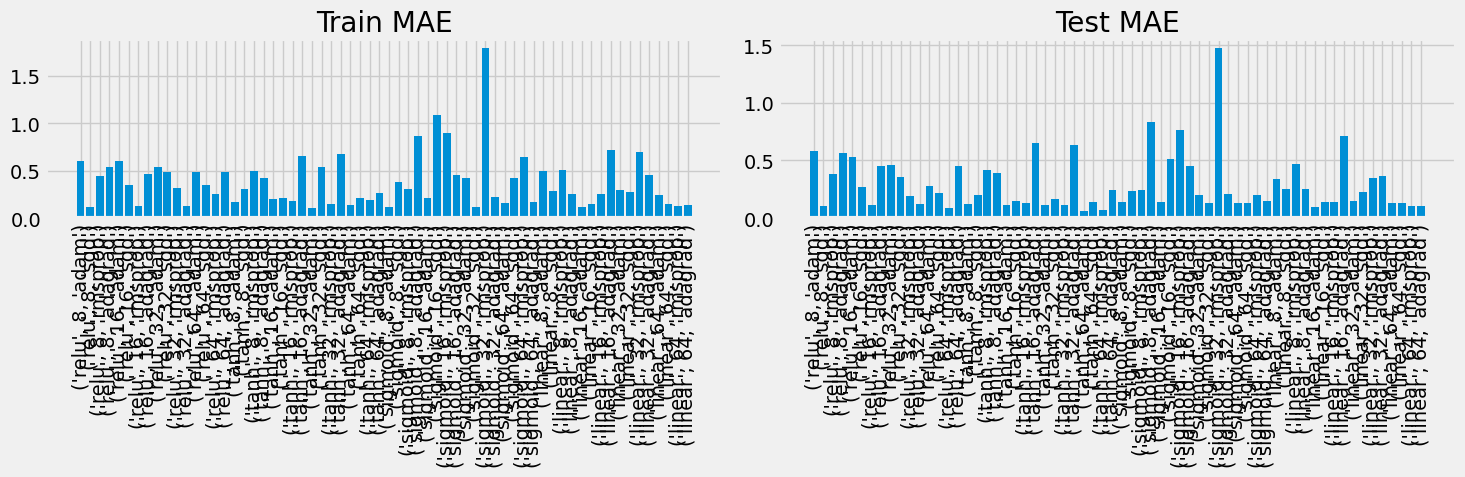

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Extract the performance metrics from the results dictionary
train_maes = [results[combo].train_mae for combo in combinations]
test_maes = [results[combo].test_mae for combo in combinations]

# Create an array of x values for plotting
x = np.arange(len(combinations))

# Unpack the train and test MAE values
train_values = [mae[0] for mae in train_maes]
test_values = [mae[0] for mae in test_maes]

# Create subplots for train MAE and test MAE
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot train MAE
ax1.bar(x, train_values)
ax1.set_title('Train MAE')
ax1.set_xticks(x)
ax1.set_xticklabels(combinations, rotation=90)

# Create a separate subplot for test MAE
ax2.bar(x, test_values)
ax2.set_title('Test MAE')
ax2.set_xticks(x)
ax2.set_xticklabels(combinations, rotation=90)

plt.tight_layout()
plt.show()


In [43]:
import pandas as pd
from IPython.display import display

pd.set_option('display.max_rows', None)


# Create a list of dictionaries where each dictionary represents a combination
data = []
for combo in combinations:
    data.append({
        'Combination': combo,
        'Train MAE': results[combo].train_mae[-1],
        'Test MAE': results[combo].test_mae[-1]
    })
  
df = pd.DataFrame(data)    
df = df.sort_values(by='Test MAE', ascending=True)

# Display the DataFrame
display(df)


,Combination,Train MAE,Test MAE
52,"(linear, 16, adam)",0.000020,0.000021
60,"(linear, 64, adam)",0.000190,0.000175
56,"(linear, 32, adam)",0.001533,0.001565
28,"(tanh, 64, adam)",0.003731,0.003560
24,"(tanh, 32, adam)",0.005348,0.006356
12,"(relu, 64, adam)",0.004259,0.007291
20,"(tanh, 16, adam)",0.007725,0.009015
2,"(relu, 8, rmsprop)",0.010925,0.012356
22,"(tanh, 16, rmsprop)",0.018675,0.013304
10,"(relu, 32, rmsprop)",0.019802,0.015329


## Brief Summary on results

Train MAE and Test MAE: These columns represent the Mean Absolute Error (MAE) on the training and test datasets, respectively. MAE is a metric that measures the average absolute differences between predicted values and actual target values. Lower MAE values indicate better model performance.

Combination: This column specifies the combination of hyperparameters used for each model, including the activation type, the number of neurons in the first and second layers, and the optimizer used.

Performance Analysis:

The models with the lowest Test MAE values (indicating better performance on unseen data) are (linear, 16, adam) and (linear, 64, adam), with Test MAE values of 0.000021 and 0.000175, respectively.
Models with 'adam' as the optimizer generally perform better compared to other optimizers, especially 'sgd' and 'adagrad'.
Models with a linear activation function tend to perform better than other activation functions.
Increasing the number of neurons in the layers does not always result in better performance. Some models with fewer neurons outperform those with more neurons.
The worst-performing models have high Test MAE values, particularly those using 'adagrad' and 'sgd' optimizers.
Model Selection: Based on Test MAE, the (linear, 16, adam) model is the best choice for your regression problem, as it has the lowest Test MAE. Consider this model as your final choice for deployment.

In [12]:
history = model.fit(X_train, y_train, epochs =50, validation_split= 0.2)

Epoch 1/50
10/10 [==============================] - 1s 17ms/step - loss: 0.3213 - mean_absolute_error: 0.5047 - val_loss: 0.2825 - val_mean_absolute_error: 0.4730
Epoch 2/50
10/10 [==============================] - 0s 4ms/step - loss: 0.1887 - mean_absolute_error: 0.3676 - val_loss: 0.1582 - val_mean_absolute_error: 0.3330
Epoch 3/50
10/10 [==============================] - 0s 4ms/step - loss: 0.0999 - mean_absolute_error: 0.2541 - val_loss: 0.0817 - val_mean_absolute_error: 0.2266
Epoch 4/50
10/10 [==============================] - 0s 4ms/step - loss: 0.0564 - mean_absolute_error: 0.1924 - val_loss: 0.0469 - val_mean_absolute_error: 0.1718
Epoch 5/50
10/10 [==============================] - 0s 4ms/step - loss: 0.0378 - mean_absolute_error: 0.1616 - val_loss: 0.0329 - val_mean_absolute_error: 0.1440
Epoch 6/50
10/10 [==============================] - 0s 4ms/step - loss: 0.0256 - mean_absolute_error: 0.1316 - val_loss: 0.0235 - val_mean_absolute_error: 0.1183
Epoch 7/50
10/10 [=========

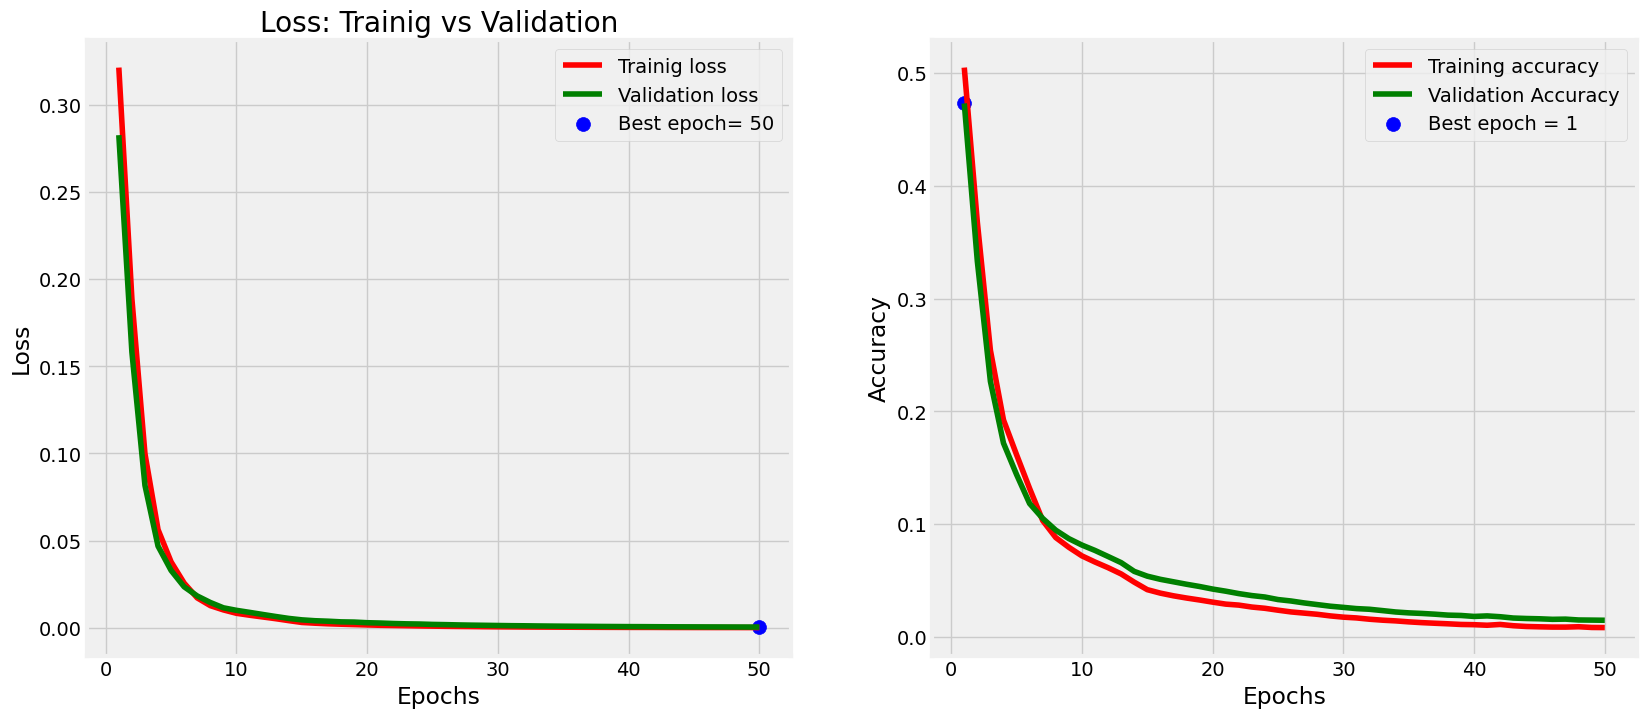

In [13]:
# training accuracy and loss
acc = history.history['mean_absolute_error']
loss = history.history['loss']


#validation accuracy and loss
v_acc = history.history['val_mean_absolute_error']
v_loss = history.history['val_loss']


#index of lowest v_loss
ind_vloss = np.argmin(v_loss)
lowest_vloss = v_loss[ind_vloss]


#index of highest v_acc
ind_vacc = np.argmax(v_acc)
heighest_vacc = v_acc[ind_vacc]


#number of epochs
epochs = [i +1 for i in range(len(acc))]

#set labels
loss_l = f'Best epoch= {str(ind_vloss +1)}'
acc_l= f'Best epoch = {str(ind_vacc +1)}'


#trainig History visualization
plt.figure(figsize= (20,8))
plt.style.use('fivethirtyeight')

plt.subplot(1,2,1)
plt.plot(epochs, loss, 'r', label = 'Trainig loss')
plt.plot(epochs, v_loss, 'g', label = 'Validation loss')
plt.scatter(ind_vloss +1, lowest_vloss, s = 100, c= 'b', label = loss_l)
plt. title('Loss: Trainig vs Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


plt.subplot(1,2,2)
plt.plot(epochs, acc, 'r', label = 'Training accuracy')
plt.plot(epochs, v_acc, 'g', label = 'Validation Accuracy')
plt.scatter(ind_vacc+1, heighest_vacc, s = 100, c = 'b', label = acc_l)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

In [14]:
y_pred  = model.predict(X_test)

4/4 [==============================] - 0s 2ms/step


In [15]:
r2_score(y_test, y_pred)

0.9855967822289192